# Librería

In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Data

In [13]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

# Primera Exploración

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic.shape

(891, 11)

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
titanic['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [19]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [20]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
titanic.isna().sum()/len(titanic)*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [22]:
print(titanic.Embarked.mode())
print(titanic.Embarked.unique())


0    S
Name: Embarked, dtype: object
['S' 'C' 'Q' nan]


In [23]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [24]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
titanic[titanic.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


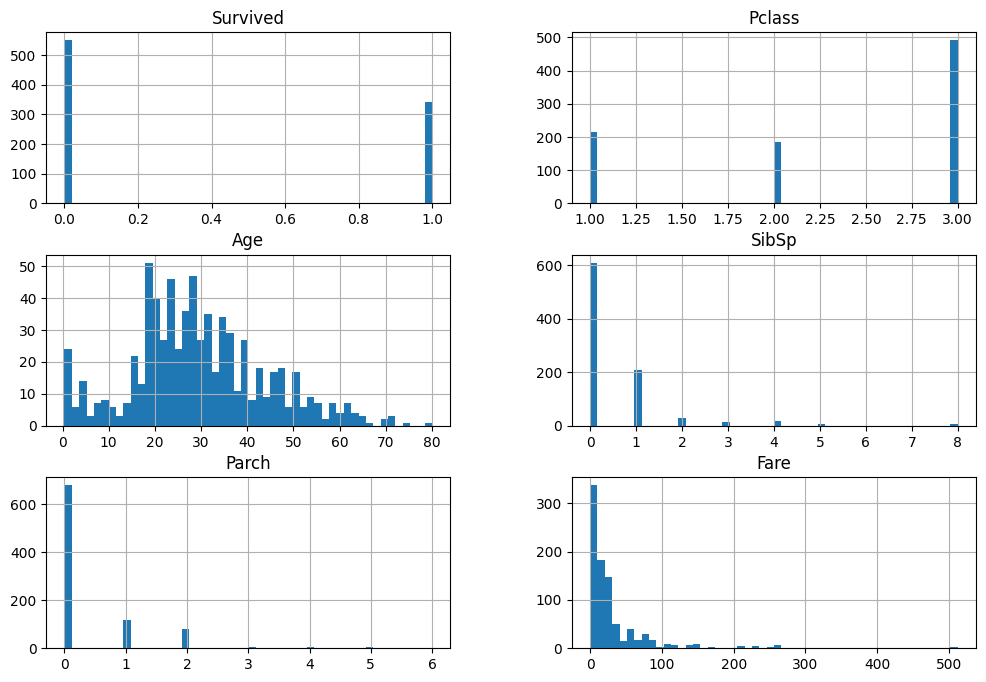

In [26]:
titanic.hist(bins=50, figsize=(12,8))
plt.show()

Sex -- one hot/label encoder
cabin??? cómo 
Age - media? moda?


# Mini EDA

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

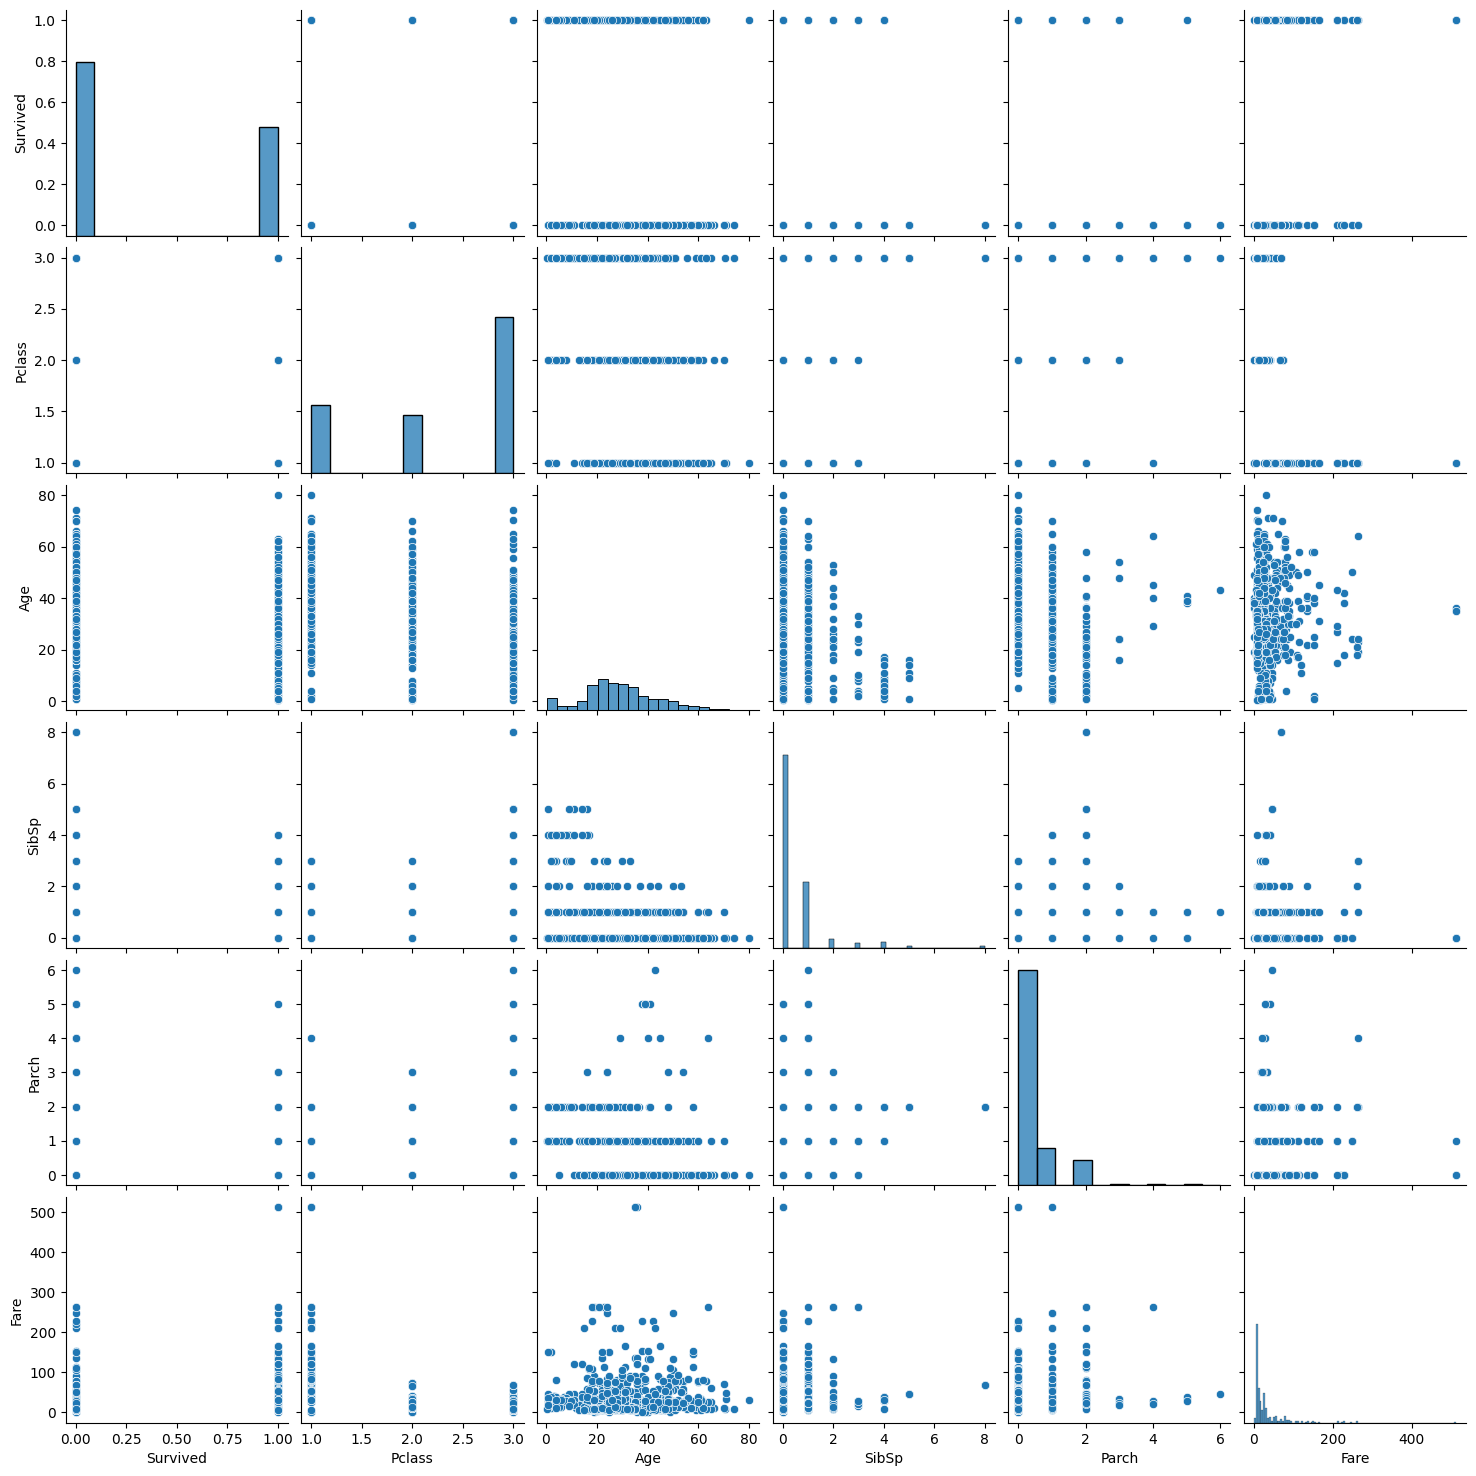

In [ ]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

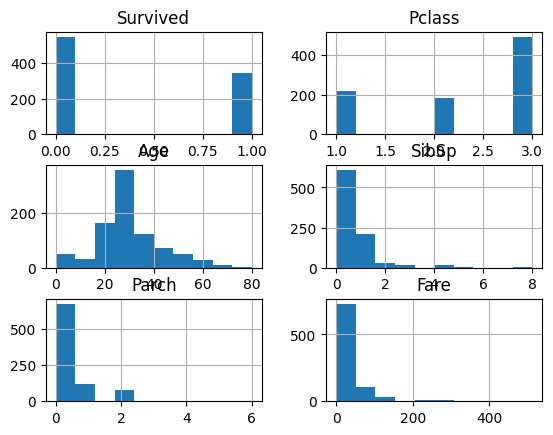

In [42]:
df.hist()

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Survived', ylabel='count'>

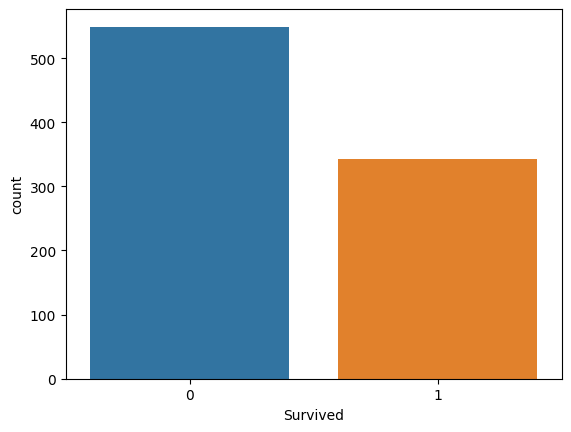

In [47]:
sns.countplot(x= 'Survived', data= titanic)

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

AttributeError: 'numpy.int64' object has no attribute 'startswith'

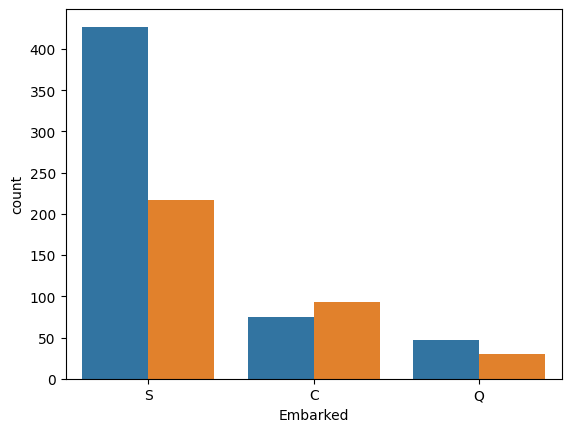

In [49]:
sns.countplot(x='Embarked', data= titanic, hue='Survived')

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='Survived', ylabel='count'>

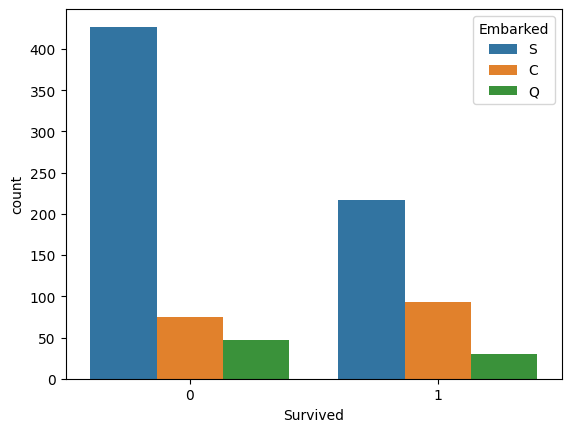

In [46]:
sns.countplot(x= 'Survived', data= titanic, hue='Embarked')

Ver que si influye en si se sobrevive el sitio donde has embarcado, por que? por la renta? la edad?

# Tratamiento de missing y valores atípicos

In [27]:
df = titanic.copy()

In [28]:
# df.drop(columns=['Cabin'], axis=1, inplace=True) 
# df.drop(columns=['Name'], axis=1, inplace=True) lo dejamos 
# df.drop(columns=['Ticket'], axis=1, inplace=True) no aporta nda

In [29]:
df.drop(columns=['Cabin', 'Ticket'], axis=1, inplace=True)

In [30]:
df['Embarked'].fillna(titanic.Embarked.mode()[0], inplace=True)
print(df['Embarked'].isna().sum())

0


PARA AGE:
media
mediana
female media de female e imputar / male media para male e imputar
mister miss no para niños (no con este df)

In [31]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [45]:
# df[df['Age']< 15]

In [32]:
ages = {'female':27.915709, 'male':30.726645}

df['Age'].fillna(df['Sex'].map(ages), inplace=True)


# OTRA FORMA
# is_male == df['Age'].
# df.loc[is_male & is_nan, 'Age'] = mean_male

In [37]:
df['Age'] = df['Age'].round(0)

In [45]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,2.110213,S
2,1,1,female,38.0,1,0,4.280593,C
3,1,3,female,26.0,0,0,2.188856,S
4,1,1,female,35.0,1,0,3.990834,S
5,0,3,male,35.0,0,0,2.202765,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,2.639057,S
888,1,1,female,19.0,0,0,3.433987,S
889,0,3,female,28.0,1,2,3.196630,S


# Feature Engineer

No se eliminan columnas en esta zona, solo deberiamos CREAR




PARCH --> log para normalizar: NO, son variables discretas, no tienen continuidad. ADEMÁS los 0 no pueden hacerse log, ya que da -inf.
FARE --> np.log. Si veo que tengo 0, no debería hacerlo. Habría que sumar 1 a la columna. No afecta porq target no es el precio, pero si lo hiciera solo habria que 'destransformar' y restar uno cuando haga el exp.
Python si que permitiría hacerlo aunq no estaría correcto. Si intentamos graficar ahi si que saldria el error.


EN FEATURE ENGINEER se podrían hacer más columnas, sumando, concatenando, restando...etc. 

Ejemplos: Dividir fare entre el parch para ver el precio por persona. 

Si vas solo tienes mas posibilidad de sobrevivir ya qu eno vas a 'esperar' a nadie. Esto podria reflejarse con parch. Si es acompaaññado y mujer iria ants.

JUAN CREA 2/3 COL:

COLUMNA 1 Une sibsp y parch, si es mayor que 1 iba acompañado, si es 0 iba solo. Así tengo solo o acompañado (no nos importa la cantidad de parsonas con las que iba, solo saberlo)

Nombre es importante, hubieramos buscado el  título de la persona  df[df['Name'].str.contains('Master')]. TODOS LOS MASTER SON NIÑOS PEQ. ASí puedo imputar la edad con la media de  esos que tienen MASTER. 


 df[df['Name'].str.contains('Miss')]['Age].mean() podemos hacer lo mismo, es una media más exacta. 

 df[df['Name'].str.contains('Mrs')]['Age].mean()

 df['Sex'] == ['female']['Age].mean()


 OTRA COLUMNA CON SI ES NIÑO O NO (age<13)



In [43]:
df['Fare'] = np.log(df['Fare']+1)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

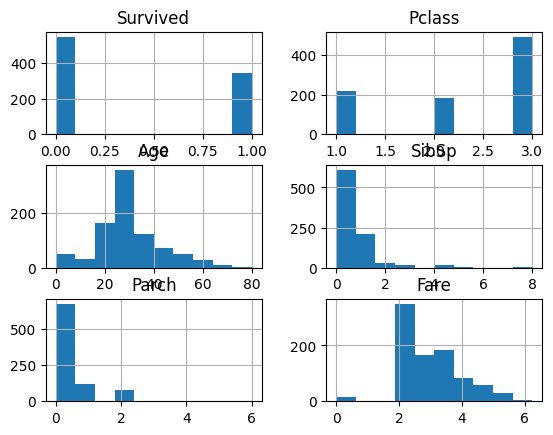

In [44]:
df.hist()

In [2]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

NameError: name 'sns' is not defined

In [ ]:
# df.Sex.replace(['male','female'],[0,1], inplace=True)
# df[Embarked].replace({'S':0, 'Q':1, 'C':2}, inplace= True)


In [1]:
# se puede sacar la feature importance para saber que columnas dejar, haciendo un randomforecrt antes de nada. 

# EJ: embarca en c y la división de muerto o no no sigue la misma distribución que el resto del barco. por eso hay algo que hay que estudiar mas a fondo. y no debemos desechar esa col. 

# que sea discrta no significa que no pueda aplicar log. pero en este caso no lo haria porq la mayor cantidad son 0 (no se puede) y solo hay 8 unique

SyntaxError: invalid syntax (2178720528.py, line 1)

# División de Datos

In [ ]:
# train_set, test_set = train_test_split(df, test_size=0.2, random_state=73)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns="Survived"), df[["Survived"]], test_size=0.2, random_state=42)

# Escalado + Dummies

Las features continuas no se escalan 

embarked OneHotEncoder

In [ ]:

# # Aplicando StandardScaler
sca = StandardScaler()
X_train_sca = pd.DataFrame(sca.fit_transform(X_train_log[col_std]), columns=col_std, index=X_train_log.index)
X_val_sca = pd.DataFrame(sca.transform(X_val_log[col_std]), columns=col_std, index=X_val_log.index) #SOLO TRANSFORM

In [ ]:
col_ohe = ['Sex', 'Embarked']

# Aplicando OneHot-Encoder
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed_X_train = OHE.fit_transform(X_train[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=df.index)
X_train_sca_ohe = pd.concat([df, transformed_df], axis=1)

transformed_X_val = OHE.transform(X_val[col_ohe])  #SOLO TRANSFORM
transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=df.index)
X_val_sca_ohe = pd.concat([X_val_sca, transformed_df], axis=1)

# Cross-Validation + Base-Lines

# Entrenar

# Predicción

# Validación del modelo